# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [1]:
# run this
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcal

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [159]:
# code here
import pandas as pd
df = pd.read_csv('dataset1.csv')
df.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

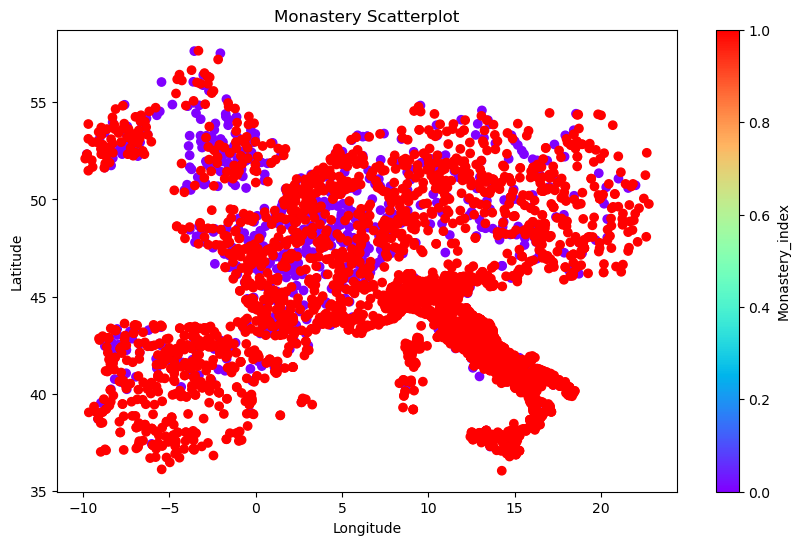

In [142]:
# code here
import matplotlib.pyplot as plt
import seaborn as sns #for colour
cmap = 'rainbow'
plt.figure(figsize=(10, 6))
scatterplot = plt.scatter(df['Longitude'], df['Latitude'], c=df['Monastery_index'], cmap=cmap, marker='o')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Monastery Scatterplot')

plt.colorbar(scatterplot, label='Monastery_index')

plt.show()


3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

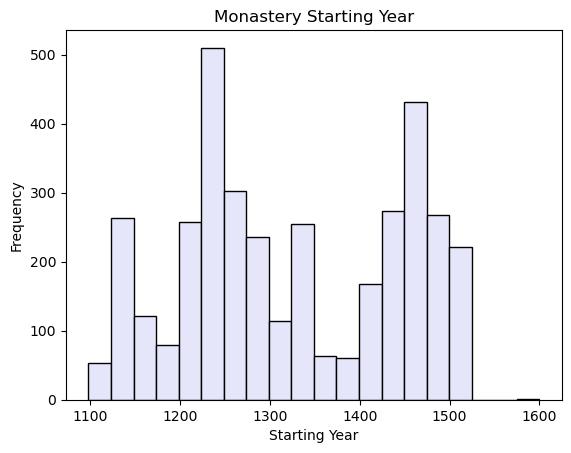

In [81]:
# code here
import matplotlib.pyplot as plt
plt.hist(df['Starting'], bins=20, color='lavender', edgecolor='black')

plt.title('Monastery Starting Year')
plt.xlabel('Starting Year')
plt.ylabel('Frequency')

plt.show()

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

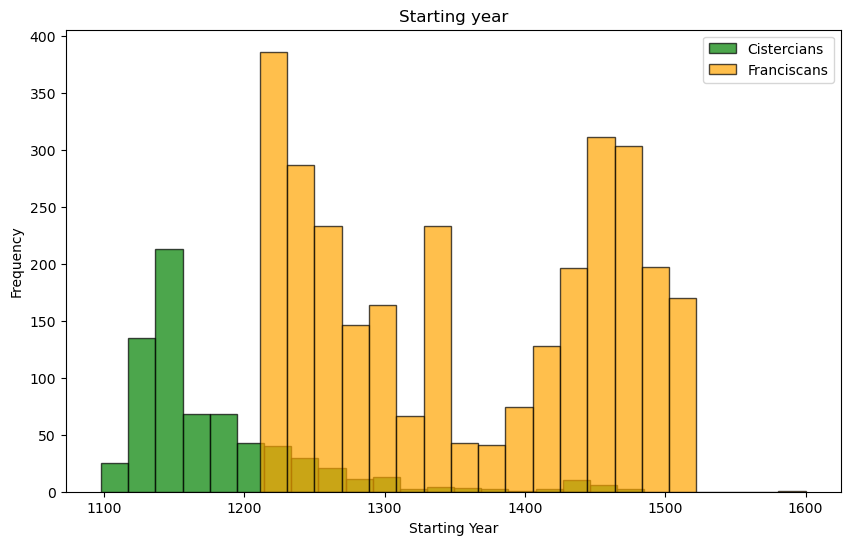

In [125]:
# code here
import matplotlib.pyplot as plt

cistercian = df[df['Monastery'] == 'Cistercians']['Starting']
franciscan = df[df['Monastery'] == 'Franciscans']['Starting']

plt.figure(figsize=(10, 6))
plt.hist(cistercian, bins = 20, alpha=0.7, label='Cistercians', color='green', edgecolor='black')
plt.hist(franciscan, bins = 20, alpha=0.7, label='Franciscans', color='orange', edgecolor='black')

plt.title('Starting year')
plt.xlabel('Starting Year')
plt.ylabel('Frequency')

plt.legend()

plt.show()

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

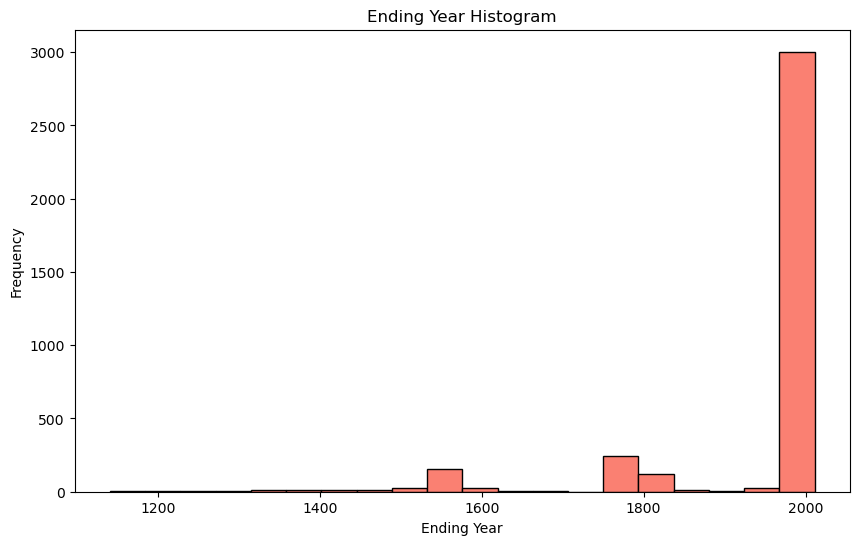

In [126]:
# code here
# Repitition of 3
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Ending'].dropna(), bins=20, color='salmon', edgecolor='black')

plt.xlabel('Ending Year')
plt.ylabel('Frequency')
plt.title('Ending Year Histogram')

plt.show()

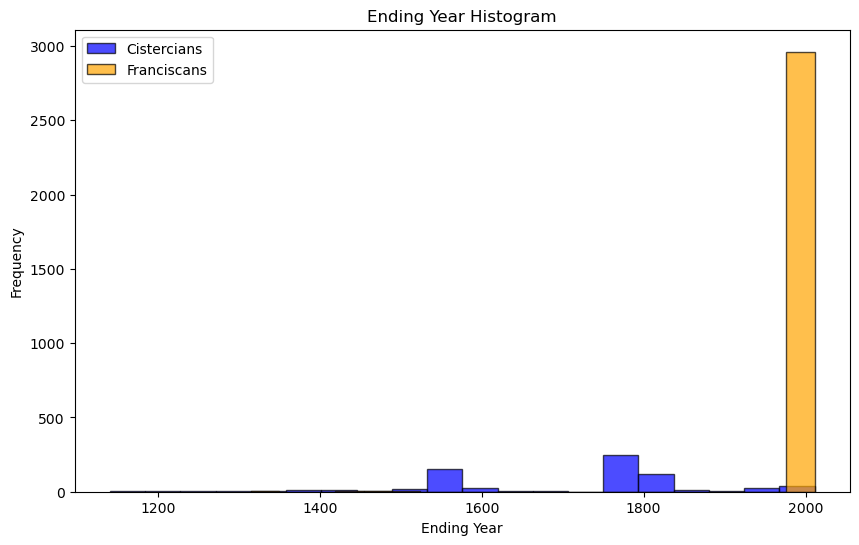

In [127]:
# Repitition of 4
cistercian = df[df['Monastery'] == 'Cistercians']['Ending']
franciscan = df[df['Monastery'] == 'Franciscans']['Ending']

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(cistercian.dropna(), bins=20, alpha=0.7, label='Cistercians', color='blue', edgecolor='black')
ax.hist(franciscan.dropna(), bins=20, alpha=0.7, label='Franciscans', color='orange', edgecolor='black')

ax.set_xlabel('Ending Year')
ax.set_ylabel('Frequency')
ax.set_title('Ending Year Histogram')

ax.legend()

plt.show()

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

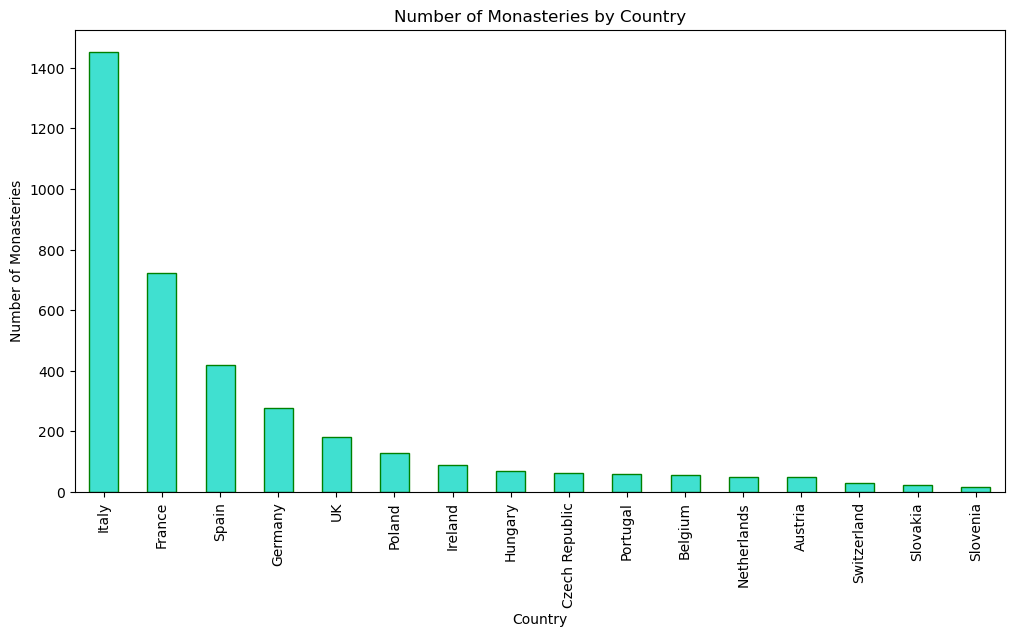

In [128]:
# Code here
import matplotlib.pyplot as plt
import pandas as pd

country = df['Country'].value_counts()

plt.figure(figsize=(12, 6))
country.plot(kind='bar', color='turquoise', edgecolor='green')

plt.xlabel('Country')
plt.ylabel('Number of Monasteries')
plt.title('Number of Monasteries by Country')

plt.show()

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [160]:
# Code here
import pandas as pd

X = df[['Starting', 'Ending']]
y = df['Monastery_index']

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [161]:
# Code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2464, 2)
X_test shape: (1214, 2)
y_train shape: (2464,)
y_test shape: (1214,)


9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

In [162]:
# Code here
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

fraction_diff = 1 - accuracy_score(y_test, y_pred)
print(f"Fraction of data points with differing predictions: {fraction_diff:.4f}")

Fraction of data points with differing predictions: 0.1870


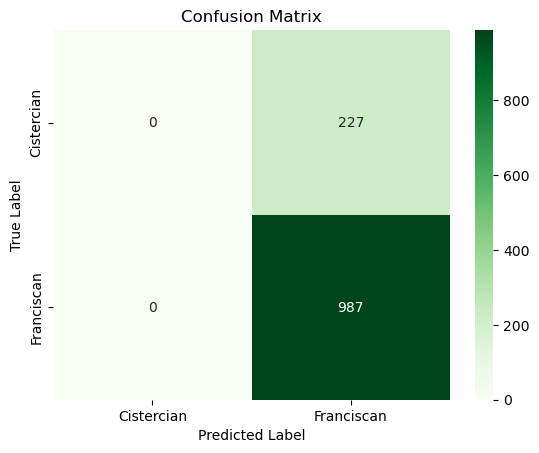

Precision: 0.8130
Recall: 1.0000
Accuracy: 0.8130
F1 Score: 0.8969


In [163]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Cistercian', 'Franciscan'], yticklabels=['Cistercian', 'Franciscan'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

In [164]:
# Code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

fraction_diff_lr = 1 - accuracy_score(y_test, y_pred_lr)
print(f"Fraction of data points with differing predictions (Logistic Regression): {fraction_diff_lr:.4f}")

Fraction of data points with differing predictions (Logistic Regression): 0.0214


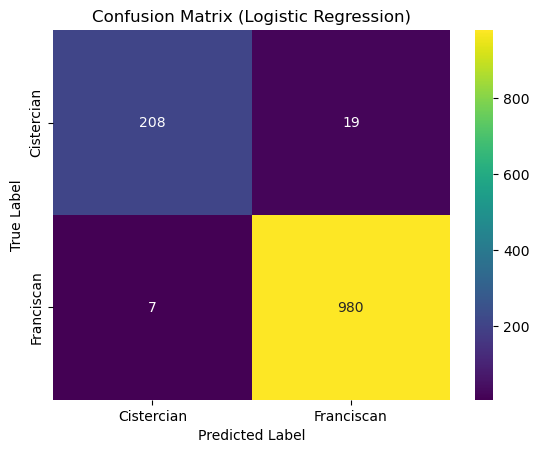

In [165]:
# Confusion matrix for logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='viridis', xticklabels=['Cistercian', 'Franciscan'], yticklabels=['Cistercian', 'Franciscan'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [166]:
# Precision, recall, accuracy, and F1 score for logistic regression
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='binary')
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Precision (Logistic Regression): {precision_lr:.4f}")
print(f"Recall (Logistic Regression): {recall_lr:.4f}")
print(f"Accuracy (Logistic Regression): {accuracy_lr:.4f}")
print(f"F1 Score (Logistic Regression): {f1_lr:.4f}")

Precision (Logistic Regression): 0.9810
Recall (Logistic Regression): 0.9929
Accuracy (Logistic Regression): 0.9786
F1 Score (Logistic Regression): 0.9869


For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

11. **Importance of Train-Test Split in Machine Learning:**
**Performance Evaluation:** Enables the assessment of a model's performance on unseen data.
Helps prevent overfitting, ensuring the model generalizes well to new data.

**Data Integrity Check:** Verifies the robustness of the model by testing it on data it has never seen during training.

**Consequences of Improper Train-Test Split:**
Overfitting: Without a proper split, the model may memorize the training data and fail to generalize to new data.

**Ineffective Generalization:** Lack of a proper split could result in a model that performs well on training data but badly on new data, hindering its real-world performance.

Information from the test set may unintentionally influence the model during training, leading to biased results.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

12. The logistic regression performed better when you add all the values of the precision, recall, accuracy, and F1 Score. The perceptron only has the advantage in recall.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

13. Yes they all changed values. They changed because of the random nature of the train-test split and the initialization of particular parameters in the perceptron and logistic regression models. The train-test split divides the data randomly into training and testing sets. The specific data points in each set can vary with each run, which then leads to variations in the scores.

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

In [147]:
# Code here
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset2.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


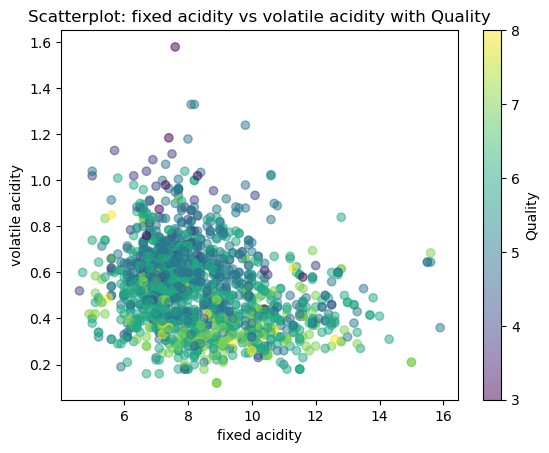

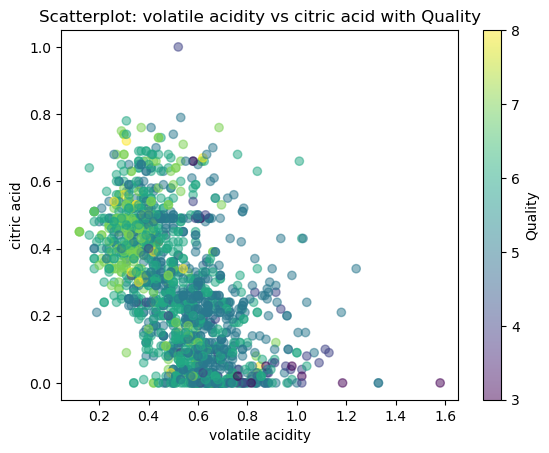

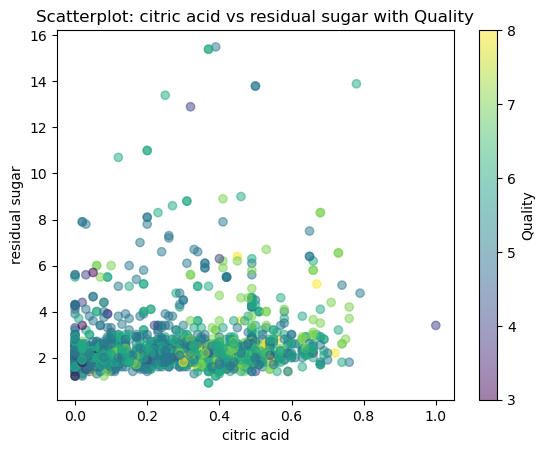

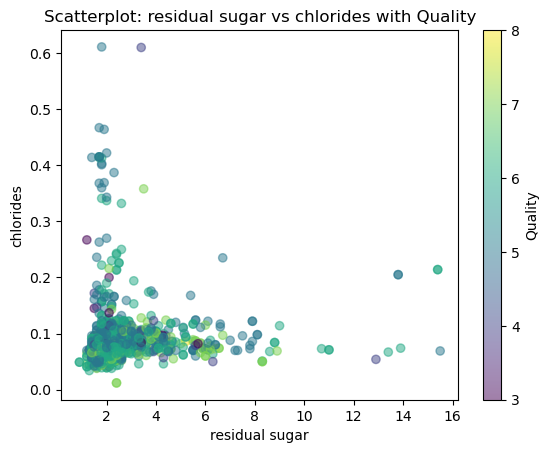

In [148]:
columns_without_quality = df.columns[df.columns != 'quality']

for i in range(4):
    x = columns_without_quality[i]
    y = columns_without_quality[(i + 1) % len(columns_without_quality)]

    # Scatterplot with 'quality' as the color axis
    plt.scatter(df[x], df[y], c=df['quality'], cmap='viridis', alpha=0.5)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatterplot: {x} vs {y} with Quality')

    cbar = plt.colorbar()
    cbar.set_label('Quality')

    # Show the plot
    plt.show()

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

Correlation between fixed acidity and volatile acidity: -0.25613089477038203


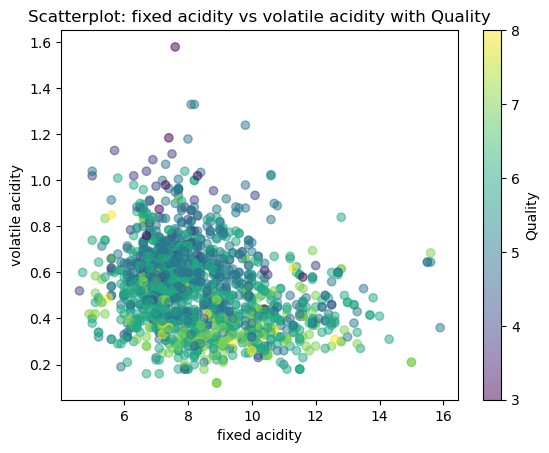

Correlation between volatile acidity and citric acid: -0.5524956845595795


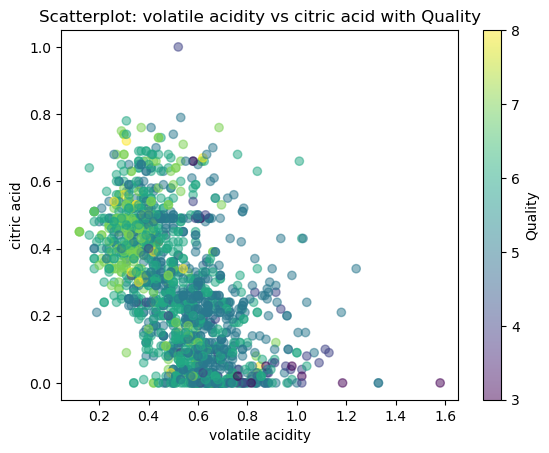

Correlation between citric acid and residual sugar: 0.14357716157031403


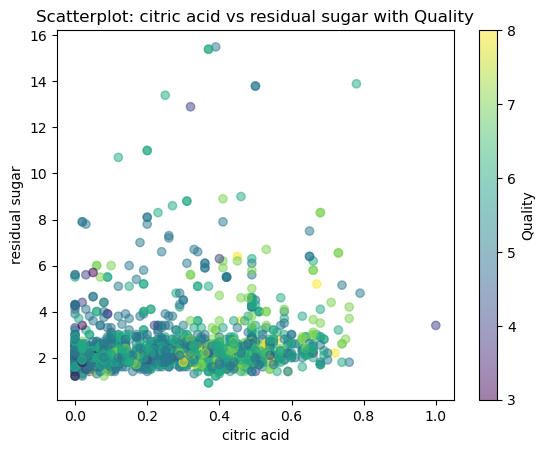

Correlation between residual sugar and chlorides: 0.0556095352035321


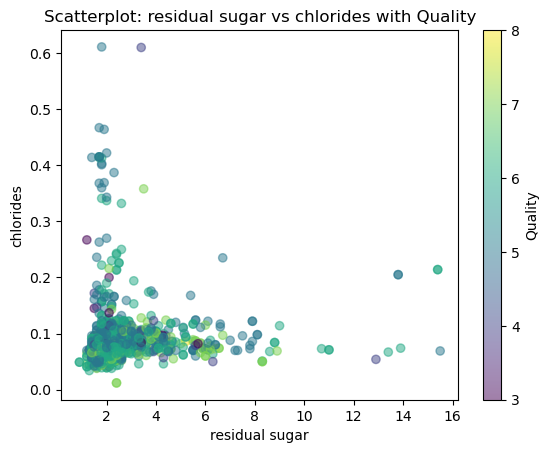

In [149]:
# Code here
import pandas as pd
import matplotlib.pyplot as plt

columns_without_quality = df.columns[df.columns != 'quality']

# Pearson correlation
for i in range(4):
    x = columns_without_quality[i]
    y = columns_without_quality[(i + 1) % len(columns_without_quality)]

    # Calculate Pearson correlation
    correlation = df[x].corr(df[y])
    
    # Names of the variables and the corresponding correlation
    print(f'Correlation between {x} and {y}: {correlation}')

    plt.scatter(df[x], df[y], c=df['quality'], cmap='viridis', alpha=0.5)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatterplot: {x} vs {y} with Quality')

    cbar = plt.colorbar()
    cbar.set_label('Quality')

    plt.show()

16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [150]:
# Code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Choosing the input variable X
X = df.columns[df.columns != 'quality'][:3]
X = df[X]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# R2 score of the linear regression
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Linear regression model’s slope coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f'Linear Regression Coefficients: {coefficients}')
print(f'Linear Regression Intercept: {intercept}')

R2 Score: 0.18290584845348323
Linear Regression Coefficients: [ 0.02053646 -1.7035173  -0.08136606]
Linear Regression Intercept: 6.378972118987667


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [152]:
# Code here
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

df = pd.read_csv('dataset2.csv')

# Choosing the input variable X
X = df.columns[df.columns != 'quality'][:3]
X = df[X]
y = df['quality']

In [153]:
# Linear regression model
model = LinearRegression()

# Define K-fold cross-validation with K=10
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation and calculate R2 scores
r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

# Mean and standard deviation of the R2 scores
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

In [154]:
print(f'Mean R2 Score: {mean_r2}')
print(f'Standard Deviation of R2 Scores: {std_r2}')

Mean R2 Score: 0.14699586647088259
Standard Deviation of R2 Scores: 0.041838896038457106


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

18. A higher R2 score won't be guaranteed and there are scenarios where the R2 score might not improve or even decrease:
It may lead to overfitting, which can result in a high R2 score on the training data. The model also becomes too specific to the training data and does not generalize well to new, unseen data.  
Including more features can enhance the model if the additional features contain relevant information about the target variable. Contrarily, if the added features are irrelevant, they may introduce noise and potentially decrease model performance.

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

19. **For linear regressions:**
Prefer the first model (R2 = 0.80) if its complexity is lower, because it uses less predictor variables or has a simpler model structure. This is because simplicity can enhance model interpretability and generalization to new data.

**For classifiers:**
Prefer the second model (accuracy = 90%) if the cost of false positives and false negatives is high, and accurate predictions are crucial. Contrarily, if there's a specific business context where the cost of false positives and false negatives differs, consider precision, recall, or F1 score for a more nuanced evaluation.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

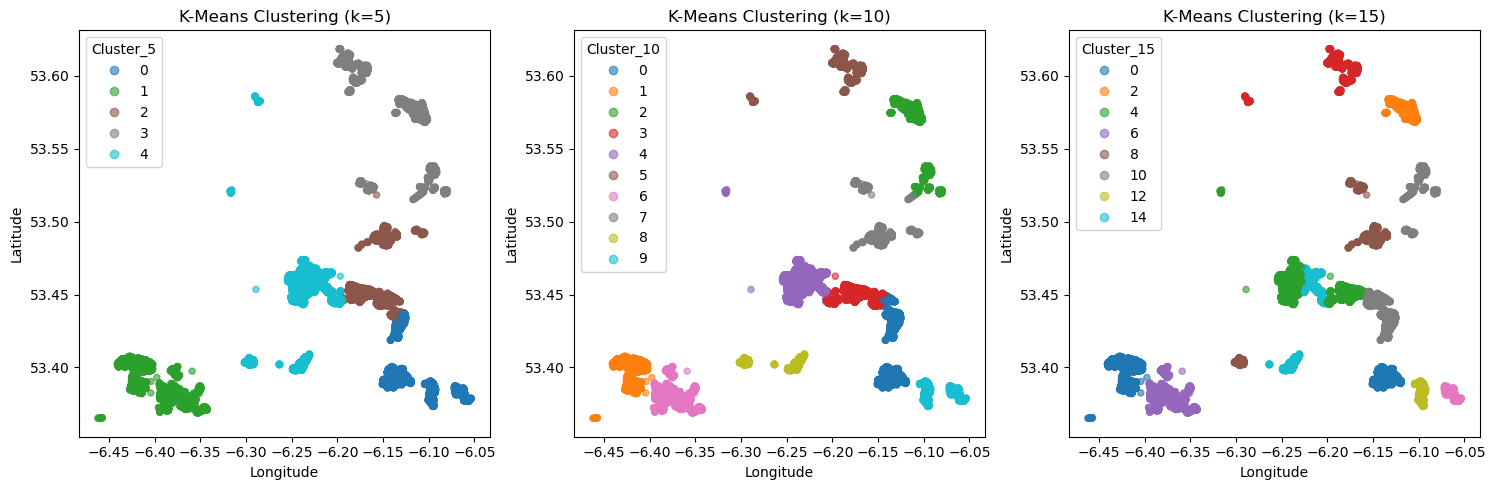

In [108]:
# Code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('dataset3.csv')
df.head()

X = df[['Longitude', 'Latitude']]

k_values = [5, 10, 15]

# Subplots to display the scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate(k_values):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    df[f'Cluster_{k}'] = kmeans.fit_predict(X)

    # Scatterplot showing the results of each clustering, with one colour for each cluster.
    scatter = axes[i].scatter(df['Longitude'], df['Latitude'], c=df[f'Cluster_{k}'], cmap='tab10', s=20, alpha=0.6)
    axes[i].set_title(f'K-Means Clustering (k={k})')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].legend(*scatter.legend_elements(), title=f'Cluster_{k}')

plt.tight_layout()
plt.show()

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

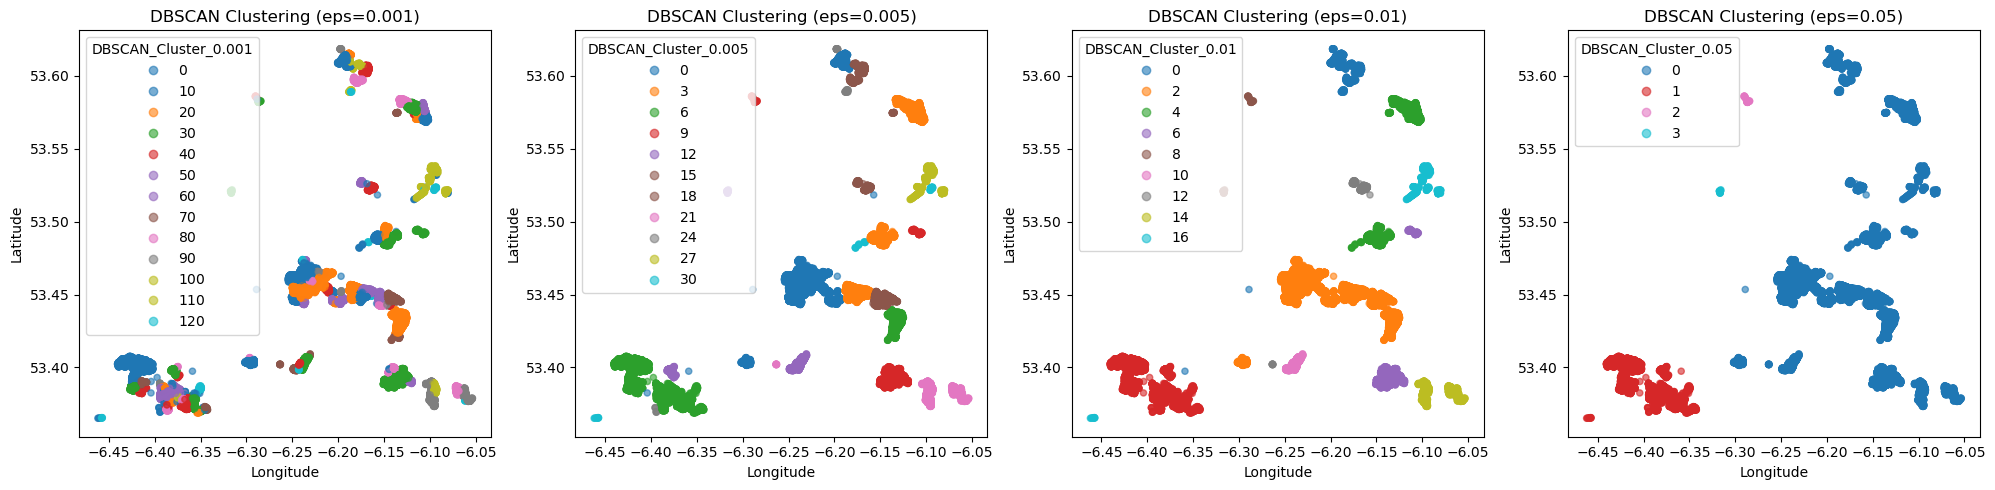

In [110]:
# Code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Cluster the trees a total of 4 times.
eps_values = [0.001, 0.005, 0.01, 0.05]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, eps in enumerate(eps_values):
    # Fit DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=5)
    df[f'DBSCAN_Cluster_{eps}'] = dbscan.fit_predict(X)

    scatter = axes[i].scatter(df['Longitude'], df['Latitude'], c=df[f'DBSCAN_Cluster_{eps}'], cmap='tab10', s=20, alpha=0.6)
    axes[i].set_title(f'DBSCAN Clustering (eps={eps})')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].legend(*scatter.legend_elements(), title=f'DBSCAN_Cluster_{eps}')

plt.tight_layout()
plt.show()

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [111]:
# Code here
from sklearn.metrics import silhouette_score

# Calculate Silhouette scores for K-means
kmeans_silhouette_scores = {}
for k in k_values:
    silhouette_score_kmeans = silhouette_score(X, df[f'Cluster_{k}'])
    kmeans_silhouette_scores[f'K-Means (k={k})'] = silhouette_score_kmeans

# Calculate Silhouette scores for DBSCAN
dbscan_silhouette_scores = {}
for eps in eps_values:
    silhouette_score_dbscan = silhouette_score(X, df[f'DBSCAN_Cluster_{eps}'])
    dbscan_silhouette_scores[f'DBSCAN (eps={eps})'] = silhouette_score_dbscan

In [112]:
# Print Silhouette scores
print("Silhouette Scores:")
print("\n".join([f"{method}: {score}" for method, score in kmeans_silhouette_scores.items()]))
print("\n".join([f"{method}: {score}" for method, score in dbscan_silhouette_scores.items()]))

# Find the method with the highest Silhouette score
best_method = max(kmeans_silhouette_scores, key=kmeans_silhouette_scores.get)
if max(dbscan_silhouette_scores.values()) > kmeans_silhouette_scores[best_method]:
    best_method = max(dbscan_silhouette_scores, key=dbscan_silhouette_scores.get)

print(f"\nThe best clustering method according to Silhouette score: {best_method}")

Silhouette Scores:
K-Means (k=5): 0.5735077183140362
K-Means (k=10): 0.6112932101000041
K-Means (k=15): 0.6436947760351623
DBSCAN (eps=0.001): 0.24654779191504977
DBSCAN (eps=0.005): 0.5407076619494622
DBSCAN (eps=0.01): 0.3930946092166295
DBSCAN (eps=0.05): 0.4388338080434456

The best clustering method according to Silhouette score: K-Means (k=15)


23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [113]:
# Code here
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin scores for K-means
kmeans_davies_bouldin_scores = {}
for k in k_values:
    davies_bouldin_score_kmeans = davies_bouldin_score(X, df[f'Cluster_{k}'])
    kmeans_davies_bouldin_scores[f'K-Means (k={k})'] = davies_bouldin_score_kmeans

# Davies-Bouldin scores for DBSCAN
dbscan_davies_bouldin_scores = {}
for eps in eps_values:
    davies_bouldin_score_dbscan = davies_bouldin_score(X, df[f'DBSCAN_Cluster_{eps}'])
    dbscan_davies_bouldin_scores[f'DBSCAN (eps={eps})'] = davies_bouldin_score_dbscan

In [114]:
# Davies-Bouldin scores
print("Davies-Bouldin Scores:")
print("\n".join([f"{method}: {score}" for method, score in kmeans_davies_bouldin_scores.items()]))
print("\n".join([f"{method}: {score}" for method, score in dbscan_davies_bouldin_scores.items()]))

best_method = min(kmeans_davies_bouldin_scores, key=kmeans_davies_bouldin_scores.get)
if min(dbscan_davies_bouldin_scores.values()) < kmeans_davies_bouldin_scores[best_method]:
    best_method = min(dbscan_davies_bouldin_scores, key=dbscan_davies_bouldin_scores.get)

print(f"\nThe best clustering method according to Davies-Bouldin score: {best_method}")

Davies-Bouldin Scores:
K-Means (k=5): 0.6182828141902562
K-Means (k=10): 0.5523188949566368
K-Means (k=15): 0.4326664177853106
DBSCAN (eps=0.001): 1.3049809975419298
DBSCAN (eps=0.005): 0.8701655709654814
DBSCAN (eps=0.01): 0.5967046437384795
DBSCAN (eps=0.05): 0.4451886348953754

The best clustering method according to Davies-Bouldin score: K-Means (k=15)


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

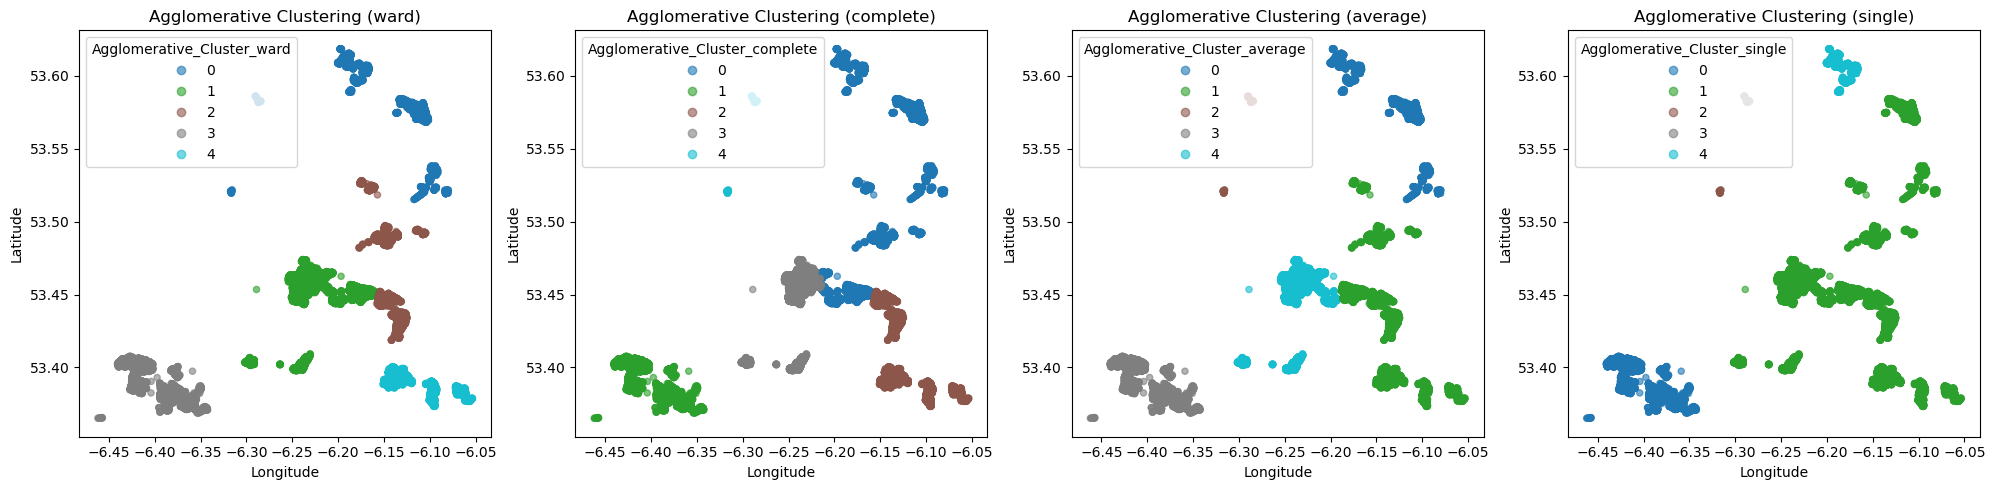

Best Agglomerative Clustering:
Best Silhouette Score: Agglomerative (linkage=average) - 0.5816684089319184
Best Davies-Bouldin Score: Agglomerative (linkage=single) - 0.43082667253069157


In [78]:
# Code here
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

linkage_methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(1, len(linkage_methods), figsize=(20, 5))

best_agglomerative_silhouette = float('-inf')
best_agglomerative_davies_bouldin = float('inf')
best_agglomerative_params = {}

for i, linkage_method in enumerate(linkage_methods):
    # Fit Agglomerative Clustering model
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=linkage_method)
    df[f'Agglomerative_Cluster_{linkage_method}'] = agglomerative.fit_predict(X)

    # Evaluate Silhouette and Davies-Bouldin scores
    silhouette_score_agglomerative = silhouette_score(X, df[f'Agglomerative_Cluster_{linkage_method}'])
    davies_bouldin_score_agglomerative = davies_bouldin_score(X, df[f'Agglomerative_Cluster_{linkage_method}'])

    # Make a scatterplot showing the results of each clustering, with one color for each cluster.
    scatter = axes[i].scatter(df['Longitude'], df['Latitude'], c=df[f'Agglomerative_Cluster_{linkage_method}'], cmap='tab10', s=20, alpha=0.6)
    axes[i].set_title(f'Agglomerative Clustering ({linkage_method})')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].legend(*scatter.legend_elements(), title=f'Agglomerative_Cluster_{linkage_method}')

    # Update best scores and parameters
    if silhouette_score_agglomerative > best_agglomerative_silhouette:
        best_agglomerative_silhouette = silhouette_score_agglomerative
        best_agglomerative_params['silhouette'] = f'Agglomerative (linkage={linkage_method})'

    if davies_bouldin_score_agglomerative < best_agglomerative_davies_bouldin:
        best_agglomerative_davies_bouldin = davies_bouldin_score_agglomerative
        best_agglomerative_params['davies_bouldin'] = f'Agglomerative (linkage={linkage_method})'

plt.tight_layout()
plt.show()

# Print the best results
print("Best Agglomerative Clustering:")
print(f"Best Silhouette Score: {best_agglomerative_params['silhouette']} - {best_agglomerative_silhouette}")
print(f"Best Davies-Bouldin Score: {best_agglomerative_params['davies_bouldin']} - {best_agglomerative_davies_bouldin}")

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

25. DBSCAN's computational complexity is influenced by the eps parameter, which defines the radius within which points are considered neighbors. The choice of the eps parameter significantly impacts the algorithm's performance. A smaller eps leads to denser clusters, increasing the algorithm's sensitivity to local variations and potentially resulting in longer runtime due to more intricate density calculations. However, a larger eps may merge clusters and decrease computation, but it risks overlooking finer-grained structures. 

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

26. **DBSCAN Example: Urban Density Clustering**

DBSCAN is advantageous in cases where urban areas show varying densities. Urban environments usually have clusters of different shapes and sizes, making DBSCAN's ability to recognise clusters of arbitrary shapes beneficial. For instance, in a city, neighborhoods with irregular boundaries and varying population densities can be effectively captured by DBSCAN. Its flexibility in handling intermittently distributed data makes it suitable for such scenarios.

**K-means Example: Customer Segmentation in Retail**

In retail, where the underlying assumption is that customers can be grouped into well-defined, spherical clusters, K-means is preferable. For instance, in customer segmentation based on purchasing behavior, K-means can divide customers into distinct groups with clear centroids. The simplicity and efficiency of K-means make it suitable for scenarios where clusters are relatively uniform and follow a more traditional, spherical structure.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

27. For Model A, the testing error curve remains unchanged once the training set size surpasses 100, indicating that adding more training examples isn't relevant in this case. However, for Model B, the testing error curve continues to decrease, showing that there is potential for the model to improve with more training examples. Furthermore, the training error curve only increases, proposing that the model is still underfitting.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

28. **Model A:** The training and testing error curves converge at a high error rate, suggesting that the model is underfitting. This scenario highlights high bias and low variance or data. The model could be improved by reducing noise in the data or increasing its complexity.

**Model B:** Both the training and testing error curves meet at a low error rate. This indicates that the model has achieved a good balance between bias and variance. Improvements could be made by fine-tuning the hyperparameters.

**Model C:** The training error is low, but the testing error is high, indicating that the model is overfitting and has low bias and high variance. Improvements could include removing features or reducing the model's complexity.

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

29. Overfitting is when a machine learning model learns the training data too well, capturing the underlying patterns, the noise and fluctuations present in the data. As a result, the model performs exceptionally well on the training set but fails to generalize effectively to new data leading to reduced performance in real-world scenarios. It can be avoided by carefully choosing relevant features and avoid including irrelevant or redundant ones.

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

**Principal Component Analysis (PCA):**

**Advantages:**

Linear method: Preserves global structures well in linear relationships.
Computational efficiency: Efficient for large datasets in comparison to t-SNE.
Well-suited for noise reduction and feature compression.

**Disadvantages:**

Assumes linearity: May not capture complex non-linear relationships in the data.
Global focus: Emphasizes variance, potentially overlooking local structures.
Sensitive to outliers: Outliers can heavily influence the principal components.

**t-Distributed Stochastic Neighbor Embedding (t-SNE):**

**Advantages:**

Non-linear method: Captures complex non-linear relationships in the data.
Preserves local structures: Effective in retaining local similarities.
Well-suited for visualization: Often provides visually meaningful representations.

**Disadvantages:**

Can be computationally expensive, especially for large datasets.
Stochastic nature: Different runs may yield different results.
Perplexity parameter sensitivity: Performance can be sensitive to the perplexity parameter.

**Uniform Manifold Approximation and Projection (UMAP):**

**Advantages:**

Balances local and global relationships effectively.
Non-linear method: Captures complex non-linear patterns.
Scalability: Often more computationally efficient than t-SNE for large datasets.

**Disadvantages:**

Parameter sensitivity: Performance can be influenced by parameters such as neighbors and min_dist.
May need careful parameter tuning for optimal results.
In some cases, UMAP can introduce spurious structures or distortions.

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

**Linearity vs. Non-linearity:** If the relationships in the data are predominantly linear, PCA may be preferred for preprocessing. If non-linear patterns are crucial, and the dataset is not too large, UMAP might be considered.

**Computational Efficiency:** For large datasets, especially when transitioning from visualization to preprocessing, the computational efficiency of the method becomes crucial. In such cases, PCA or UMAP might be preferred over t-SNE.

**Balance Between Global and Local Structures:** Consider the balance between preserving global and local structures. PCA is more focused on global structures, while t-SNE and UMAP can capture local structures effectively. The choice depends on the specific characteristics of the data and the requirements of the machine learning task.

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

32. **Interpretability:** For tasks where interpretability is crucial, such as in biomedical applications, PCA may be preferred due to its linear nature. The resulting principal components are easily interpretable as linear combinations of the original features. t-SNE and UMAP, being non-linear, provide visual insights but may lack straightforward interpretability.

**Stability:** Stability, or the consistency of results across different runs or datasets, is vital. PCA is deterministic, producing consistent results. In contrast, t-SNE and UMAP are stochastic, meaning different runs may produce different visualizations. If stability is a priority, especially in scenarios requiring reproducibility, PCA is probably more reliable.

**Stochastic Nature of t-SNE and UMAP:**
**t-SNE:** t-SNE can produce different visualizations in each run, potentially leading to mixed interpretations. It's important to run it severally and parameter settings to assess the stability of the results.

**UMAP:** While UMAP isn't as stochastic as t-SNE, it still involves randomness in its initialization. Cautious parameter tuning and multiple runs are recommended for obtaining stable embeddings.

**Linear Assumptions of PCA:**
**Limitations in Capturing Complex Relationships:** PCA assumes linearity. This limits its ability to capture complex non-linear relationships in the data. In scenarios where non-linear patterns are crucial, such as in high-dimensional biomedical datasets, the linear nature of PCA could lead to oversimplification, potentially missing essential features.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

33. A case where a medical diagnostic classifier is designed to identify a rare disease but the dataset used for training and testing is imbalanced, with a most of the samples being negative for the disease. It achieves a high accuracy rate but tends to predict most cases as negative including the positive ones.
Precision and recall is a metric that can provide insights into the model's ability to correctly identify positive cases. In this case, a low recall indicates that the classifier might be missing positive cases, even though it has high accuracy. 
Another metric is using a confusion matrix to provides a detailed breakdown of true positives, true negatives, false positives, and false negatives, which will give a better understanding of the classifier's performance.

34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

34. Achieving 100% precision and 100% recall simultaneously is often impossible due to the precision-recall trade-off. Precision focuses on minimizing false positives, while recall aims to minimize false negatives. Adjusting the classification threshold to increase precision usually decreases recall, and vice versa. Striking a perfect balance is challenging, as optimizing for one metric often comes at the expense of the other. This trade-off is inherent in classification tasks and is influenced by the nature of the data and the problem at hand.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

35. **High Recall, Low Precision:**

In an email spam filter, it is preferable to have high recall even at the cost of lower precision. This means allowing some legitimate emails to be classified as spam is acceptable, as long as all actual spam emails are correctly identified. Missing important emails can be more detrimental than occasionally marking a legitimate email as spam.

**High Precision, Low Recall:**

In a fraud detection system for credit card transactions, it is preferable to have high precision even if recall is lower. Precision is crucial in this scenario because incorrectly pointing out non-fraudulent transactions as fraudulent can inconvenience users. While some fraudulent transactions might be missed, maintaining high precision helps prevent unnecessary disruptions for legitimate users.

Although both have their strengths and weaknesses, they are still never 100% accurate all the time.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

36. An image classification model trained to recognize objects in well-lit environments achieving high accuracy while, its accuracy significantly drops when images are taken in low-light conditions. This may be caused by the model heavily relying on well-lit training data, and the features learned not generalizing well to images with different lighting conditions, resulting in reduced accuracy in low-light conditions.To solve this, apply normalization to make the model more resilient to variations in lighting. Also, incorporating domain adaptation methods such as few-shot domain adaptation can help enhance the model's performance.

37. Give an example of a machine learning algorithm that might have low errorin its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

37. A facial recognition algorithm's inability to generalize to underrepresented groups resulting in biased and inaccurate predictions, raising ethical concerns. This may be caused due to a low sample size of specific ethnic groups. Regular audits and updates to the model with new and diverse data can further enhance fairness and reduce bias.

_________________